In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#needed to import qke procedures
import sys
from pathlib import Path


main_dir = str(Path().resolve().parent)
sys.path.insert(1, main_dir)

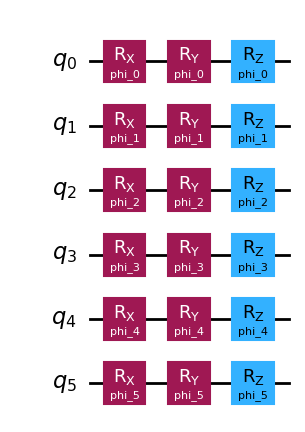

In [3]:
from numpy import full
from pqk.Circuits import Circuits

q_template = Circuits.xyz_encoded(6, full_ent=False)
q_template.draw('mpl')

In [4]:
from math import e
from pqk.CircuitContainer import CircuitContainer
from pqk.QMeasures import QMeasures
from qiskit_algorithms.utils import algorithm_globals
import numpy as np

#set the seed
np.random.seed(123)
algorithm_globals.random_seed = 123

#load dataset with panda
#data are scaled outside the notebook
import pandas as pd

env = pd.read_csv('../data/env.sel3.scaled.csv')  
X = env[['illuminance', 'blinds','lamps','rh', 'co2', 'temp']]

X_value = X.values[0]

#print(X_value)

my_q_assigned = CircuitContainer.qEncoding(q_template, X_value)
#display(my_q_assigned.draw())

#try evaluatin function

a = QMeasures.Aer(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
b = QMeasures.PrimitiveEstimator(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'], nshots = 100)
c = QMeasures.StateVectorEstimator(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])



print(f'{QMeasures.Aer.__name__}:{a}')
print(f'{QMeasures.PrimitiveEstimator.__name__}:{b}')
print(f'{QMeasures.StateVectorEstimator.__name__}:{c}')

#THIS WORK ONLY IF A GPU IS PRESENT. REMOVE OR COMMENT THIS LINE ELSEWHERE
d = QMeasures.GPUAerStateVectorEstimator(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
e = QMeasures.GPUAerVigoNoiseStateVectorEstimator(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])

print(f'{QMeasures.GPUAerStateVectorEstimator.__name__}:{d}')
print(f'{QMeasures.GPUAerVigoNoiseStateVectorEstimator.__name__}:{e}')

Aer:[0.9962803  0.29031216 0.8433706  1.         0.29192658 0.29851891]
PrimitiveEstimator:[0.99366664 0.30017203 0.92450484 1.         0.24630262 0.35496485]
StateVectorEstimator:[0.9962803  0.29031216 0.8433706  1.         0.29192658 0.29851891]


RuntimeError: Simulation device "GPU" is not supported on this system

In [35]:
from pqk.CircuitContainer import CircuitContainer
from pqk.QMeasures import QMeasures
c_zz = CircuitContainer(qtemplate=Circuits.zzfeaturemap, nwire=6, obs=['ZIIIII'], measure_fn=QMeasures.StateVectorEstimator)
c_zz.metadata()

*** Quantum template for feature map using 6 qubit ***
     ┌──────────────────────────────────────────────────────────┐
q_0: ┤0                                                         ├
     │                                                          │
q_1: ┤1                                                         ├
     │                                                          │
q_2: ┤2                                                         ├
     │  ZZFeatureMap(phi[0],phi[1],phi[2],phi[3],phi[4],phi[5]) │
q_3: ┤3                                                         ├
     │                                                          │
q_4: ┤4                                                         ├
     │                                                          │
q_5: ┤5                                                         ├
     └──────────────────────────────────────────────────────────┘
*** Required observables: ['ZIIIII']
*** Measure procedure: StateVectorEstimator
*** CK

''

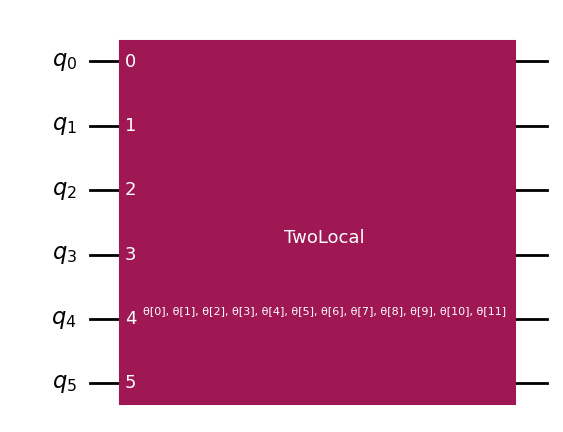

Numbers of layers: 12


In [36]:
from qiskit.circuit.library import TwoLocal

n_qubits = 6
n_layers = 1
#circuit = TwoLocal(n_qubits, 'ry', 'cx', 'linear', reps=n_layers)
twl = TwoLocal(n_qubits, 
                   rotation_blocks='ry', 
                   entanglement_blocks='cx', 
                   entanglement='full', 
                   reps=n_layers, 
                   insert_barriers=True, skip_final_rotation_layer=False)

display(twl.draw('mpl'))


num_pars = len(twl.parameters)
print(f'Numbers of layers: {num_pars}')




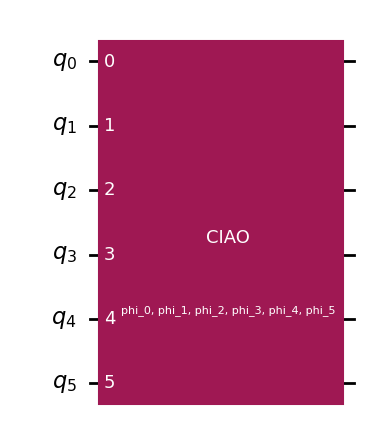

In [37]:
from textwrap import wrap
from qiskit import QuantumCircuit
from pqk.Circuits import Circuits

cc = Circuits.xyz_encoded(full_ent=True, n_wire=6)

c_com = QuantumCircuit(6)
cc.name = 'CIAO'

#using wrap to mask the circuits
composed = c_com.compose(cc, inplace=False, wrap = True)

composed.draw('mpl')





In [38]:
c1 = Circuits.xyz_encoded(6, param_prefix='x')
c2 = Circuits.zy_decomposition(6, param_prefix='theta', full_ent=False)

c1.barrier()

composed = c1.compose(c2, inplace=False, front=False)
display(composed.draw('text'))

display(c1.draw())


┌─────────┐┌─────────┐┌─────────┐                         ┌───┐ ░ »
q_0: ┤ Rx(x_0) ├┤ Ry(x_0) ├┤ Rz(x_0) ├──■──────────────────────┤ X ├─░─»
     ├─────────┤├─────────┤├─────────┤┌─┴─┐                    └─┬─┘ ░ »
q_1: ┤ Rx(x_1) ├┤ Ry(x_1) ├┤ Rz(x_1) ├┤ X ├──■───────────────────┼───░─»
     ├─────────┤├─────────┤├─────────┤└───┘┌─┴─┐                 │   ░ »
q_2: ┤ Rx(x_2) ├┤ Ry(x_2) ├┤ Rz(x_2) ├─────┤ X ├──■──────────────┼───░─»
     ├─────────┤├─────────┤├─────────┤     └───┘┌─┴─┐            │   ░ »
q_3: ┤ Rx(x_3) ├┤ Ry(x_3) ├┤ Rz(x_3) ├──────────┤ X ├──■─────────┼───░─»
     ├─────────┤├─────────┤├─────────┤          └───┘┌─┴─┐       │   ░ »
q_4: ┤ Rx(x_4) ├┤ Ry(x_4) ├┤ Rz(x_4) ├───────────────┤ X ├──■────┼───░─»
     ├─────────┤├─────────┤├─────────┤               └───┘┌─┴─┐  │   ░ »
q_5: ┤ Rx(x_5) ├┤ Ry(x_5) ├┤ Rz(x_5) ├────────────────────┤ X ├──■───░─»
     └─────────┘└─────────┘└─────────┘                    └───┘      ░ »
«     ┌─────────────────┐┌──────────────────┐┌──────────────────┐
«q_0: ┤ Rz(thetabeta_0) ├┤ Ry(thetagamma_0) ├┤ Rz(thetadelta_0) ├
«     ├─────────────────┤├──────────────────┤├──────────────────┤
«q_1: ┤ Rz(thetabeta_1) ├┤ Ry(thetagamma_1) ├┤ Rz(thetadelta_1) ├
«     ├─────────────────┤├──────────────────┤├──────────────────┤
«q_2: ┤ Rz(thetabeta_2) ├┤ Ry(thetagamma_2) ├┤ Rz(thetadelta_2) ├
«     ├─────────────────┤├──────────────────┤├──────────────────┤
«q_3: ┤ Rz(thetabeta_3) ├┤ Ry(thetagamma_3) ├┤ Rz(thetadelta_3) ├
«     ├─────────────────┤├──────────────────┤├──────────────────┤
«q_4: ┤ Rz(thetabeta_4) ├┤ Ry(thetagamma_4) ├┤ Rz(thetadelta_4) ├
«     ├─────────────────┤├──────────────────┤├──────────────────┤
«q_5: ┤ Rz(thetabeta_5) ├┤ Ry(thetagamma_5) ├┤ Rz(thetadelta_5) ├
«     └─────────────────┘└──────────────────┘└──────────────────┘

┌─────────┐┌─────────┐┌─────────┐                         ┌───┐ ░ 
q_0: ┤ Rx(x_0) ├┤ Ry(x_0) ├┤ Rz(x_0) ├──■──────────────────────┤ X ├─░─
     ├─────────┤├─────────┤├─────────┤┌─┴─┐                    └─┬─┘ ░ 
q_1: ┤ Rx(x_1) ├┤ Ry(x_1) ├┤ Rz(x_1) ├┤ X ├──■───────────────────┼───░─
     ├─────────┤├─────────┤├─────────┤└───┘┌─┴─┐                 │   ░ 
q_2: ┤ Rx(x_2) ├┤ Ry(x_2) ├┤ Rz(x_2) ├─────┤ X ├──■──────────────┼───░─
     ├─────────┤├─────────┤├─────────┤     └───┘┌─┴─┐            │   ░ 
q_3: ┤ Rx(x_3) ├┤ Ry(x_3) ├┤ Rz(x_3) ├──────────┤ X ├──■─────────┼───░─
     ├─────────┤├─────────┤├─────────┤          └───┘┌─┴─┐       │   ░ 
q_4: ┤ Rx(x_4) ├┤ Ry(x_4) ├┤ Rz(x_4) ├───────────────┤ X ├──■────┼───░─
     ├─────────┤├─────────┤├─────────┤               └───┘┌─┴─┐  │   ░ 
q_5: ┤ Rx(x_5) ├┤ Ry(x_5) ├┤ Rz(x_5) ├────────────────────┤ X ├──■───░─
     └─────────┘└─────────┘└─────────┘                    └───┘      ░

In [39]:
import numpy as np

#from sklearn.metrics.pairwise import linear_kernel as l
from sklearn.metrics.pairwise import rbf_kernel
#from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics.pairwise import linear_kernel
from pqk.CKernels import CKernels


x = np.array([6,10]) 
y = np.array([8,7]) 
z = np.array([x,y]) 

print(z)
print(rbf_kernel(z)[0][1])
print(linear_kernel(z)[0][1])
print(CKernels.rbf(x,y))
print(CKernels.linear(x,y))






[[ 6 10]
 [ 8  7]]
0.0015034391929775724
118.0
0.0015034391929775739
118


In [40]:
xyz = Circuits.xyz_encoded(n_wire=6, full_ent=True)

In [41]:
print(xyz.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_X}\,(\mathrm{phi_0})} & \gate{\mathrm{R_Y}\,(\mathrm{phi_0})} & \gate{\mathrm{R_Z}\,(\mathrm{phi_0})} & \ctrl{1} & \qw & \qw & \qw & \qw & \targ & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{R_X}\,(\mathrm{phi_1})} & \gate{\mathrm{R_Y}\,(\mathrm{phi_1})} & \gate{\mathrm{R_Z}\,(\mathrm{phi_1})} & \targ & \ctrl{1} & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{R_X}\,(\mathrm{phi_2})} & \gate{\mathrm{R_Y}\,(\mathrm{phi_2})} & \gate{\mathrm{R_Z}\,(\mathrm{phi_2})} & \qw & \targ & \ctrl{1} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{R_X}\,(\mathrm{phi_3})} & \gate{\mathrm{R_Y}\,(\mathrm{phi_3})} & \gate{\mathrm{R_Z}\,(\mathrm{phi

In [42]:
my_q_assigned = CircuitContainer.qEncoding(xyz, X_value)

/tmp/ipykernel_6003/57536248.py:1: DeprecationWarning: CircuitContainer will be deprecated.
  my_q_assigned = CircuitContainer.qEncoding(xyz, X_value)


In [43]:
print(X_value)
print(my_q_assigned.draw(output='latex_source'))

[-0.99277374  1.          0.          0.40689999 -1.00177691 -0.06102718]
\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_X}\,(\mathrm{-0.9928})} & \gate{\mathrm{R_Y}\,(\mathrm{-0.9928})} & \gate{\mathrm{R_Z}\,(\mathrm{-0.9928})} & \ctrl{1} & \qw & \qw & \qw & \qw & \targ & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{R_X}\,(\mathrm{1})} & \gate{\mathrm{R_Y}\,(\mathrm{1})} & \gate{\mathrm{R_Z}\,(\mathrm{1})} & \targ & \ctrl{1} & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{R_X}\,(\mathrm{0})} & \gate{\mathrm{R_Y}\,(\mathrm{0})} & \gate{\mathrm{R_Z}\,(\mathrm{0})} & \qw & \targ & \ctrl{1} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{R_X}\,(\mathrm{0.4069})} & \gate{\mathrm{R

In [44]:
#UNITARY EVOLUTION IS REVERSIBLE!!!!


from qiskit.quantum_info import Statevector, Operator
U = Operator.from_label('T')
#U = Operator(np.array([[np.cos(0.14),  - np.sin(0.14)],[np.sin(0.14), np.cos(0.14)]]))
psi = Statevector.from_label('+')

print(f'Operator: ')
display(U.draw('latex'))
print(f'Is the operator unitary?: {U.is_unitary()}')

print(f'Current state:')
display(psi.draw('latex'))

print('Evolution:')
display(psi.evolve(U).draw('latex'))
print('Inverse Evolution:')
display(psi.evolve(U).evolve(U.adjoint()).draw('latex'))





Operator: 


<IPython.core.display.Latex object>

Is the operator unitary?: True
Current state:


<IPython.core.display.Latex object>

Evolution:


<IPython.core.display.Latex object>

Inverse Evolution:


<IPython.core.display.Latex object>

In [45]:
Operator(np.array([[np.cos(0.14),  - np.sin(0.14)],[np.sin(0.14), np.cos(0.14)]]))

Operator([[ 0.990216  +0.j, -0.13954311+0.j],
          [ 0.13954311+0.j,  0.990216  +0.j]],
         input_dims=(2,), output_dims=(2,))


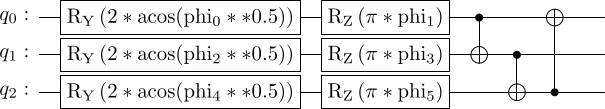

In [46]:
from pqk.Circuits import Circuits

uniform_enc = Circuits.uniform_bloch_encoding(n_wire=3)
uniform_enc.draw('latex')

[0.99277374 1.         0.         0.40689999 1.00177691 0.06102718]
nan
Try to assign [0.4, 0.001, 0.5, 0.03, 0.9, 1]


/tmp/ipykernel_6003/253667765.py:6: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos((data_to_encode[4])**0.5))
/tmp/ipykernel_6003/253667765.py:7: RuntimeWarning: invalid value encountered in arccos
  np.arccos(data_to_encode**(1/2))
/tmp/ipykernel_6003/253667765.py:11: DeprecationWarning: CircuitContainer will be deprecated.
  uniform_enc_assigned = CircuitContainer.qEncoding(uniform_enc, data_to_encode)


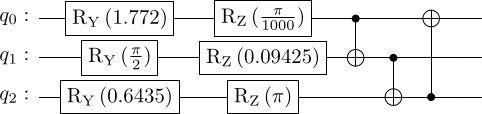

In [47]:
#try to encoding using uniform
from pqk.CircuitContainer import CircuitContainer

data_to_encode = np.abs(X_value)
print(data_to_encode)
print(np.arccos((data_to_encode[4])**0.5))
np.arccos(data_to_encode**(1/2))

data_to_encode = [0.4, 0.001, 0.5,0.03, 0.9, 1]
print(f'Try to assign {data_to_encode}')
uniform_enc_assigned = CircuitContainer.qEncoding(uniform_enc, data_to_encode)
uniform_enc_assigned.draw('latex')


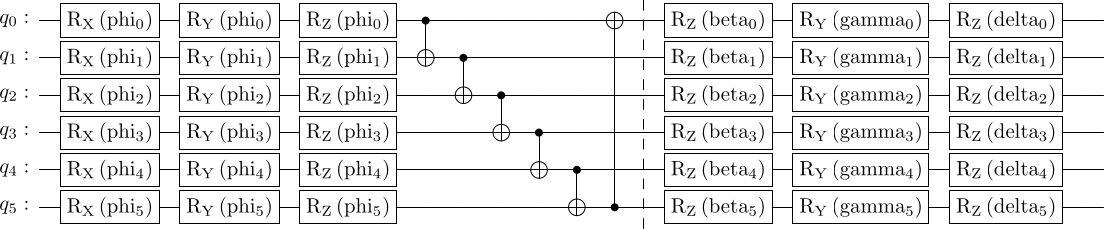

In [48]:
zy_decomposition = Circuits.zy_decomposition(n_wire=6, full_ent=False, param_prefix='')
xyz =  Circuits.xyz_encoded(n_wire=6, full_ent=True)
xyz.barrier()
xyz.compose(zy_decomposition).draw('latex')

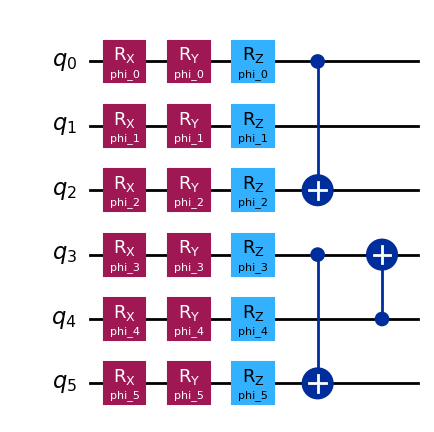

In [17]:
corr3 = Circuits.corr3_encoded(n_wire=6)
display(corr3.draw('mpl'))

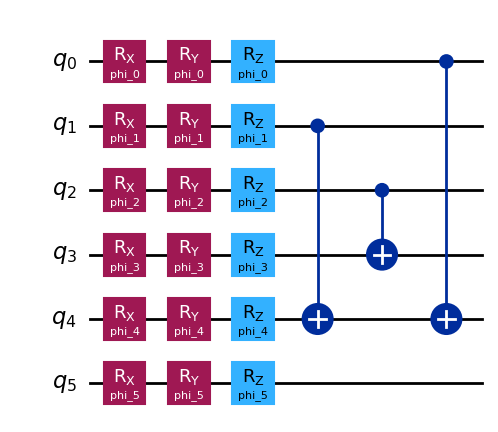

In [18]:
anticorr3 = Circuits.anticorr3_encoded(n_wire=6)
display(anticorr3.draw('mpl'))

In [10]:
#try RowVectorFeatureMap
from qiskit_machine_learning.circuit.library import RawFeatureVector
import numpy as np

rw = RawFeatureVector(4)

state = np.array([1, 0, 0, 1]) / np.sqrt(2)

boud =  rw.assign_parameters(state, )

#boud.draw('mpl')







┌──────────────────┐
q_0: ─|0>─┤0                 ├
          │  disentangler_dg │
q_1: ─|0>─┤1                 ├
          └──────────────────┘

In [4]:
import numpy as np

def generate_symmetric_matrix(size):
    matrix = np.random.randint(size=size, high=10, low=1)
    return np.triu(matrix) + np.triu(matrix, 1).T

symmetric_matrix = generate_symmetric_matrix(6)
print(symmetric_matrix)




[[2 2 9 1 2 8]
 [2 2 9 1 2 8]
 [9 9 9 1 2 8]
 [1 1 1 1 2 8]
 [2 2 2 2 2 8]
 [8 8 8 8 8 8]]


In [5]:
iq_circ = Circuits.IQPfeaturemap(symmetric_matrix)


iq_circ.draw('mpl')

TypeError: 'module' object is not callable

In [6]:
rip_rh = Circuits.IQPfeaturemapRH(n_wire=6, seed_=1235)

rip_rh.draw('mpl')

TypeError: 'module' object is not callable

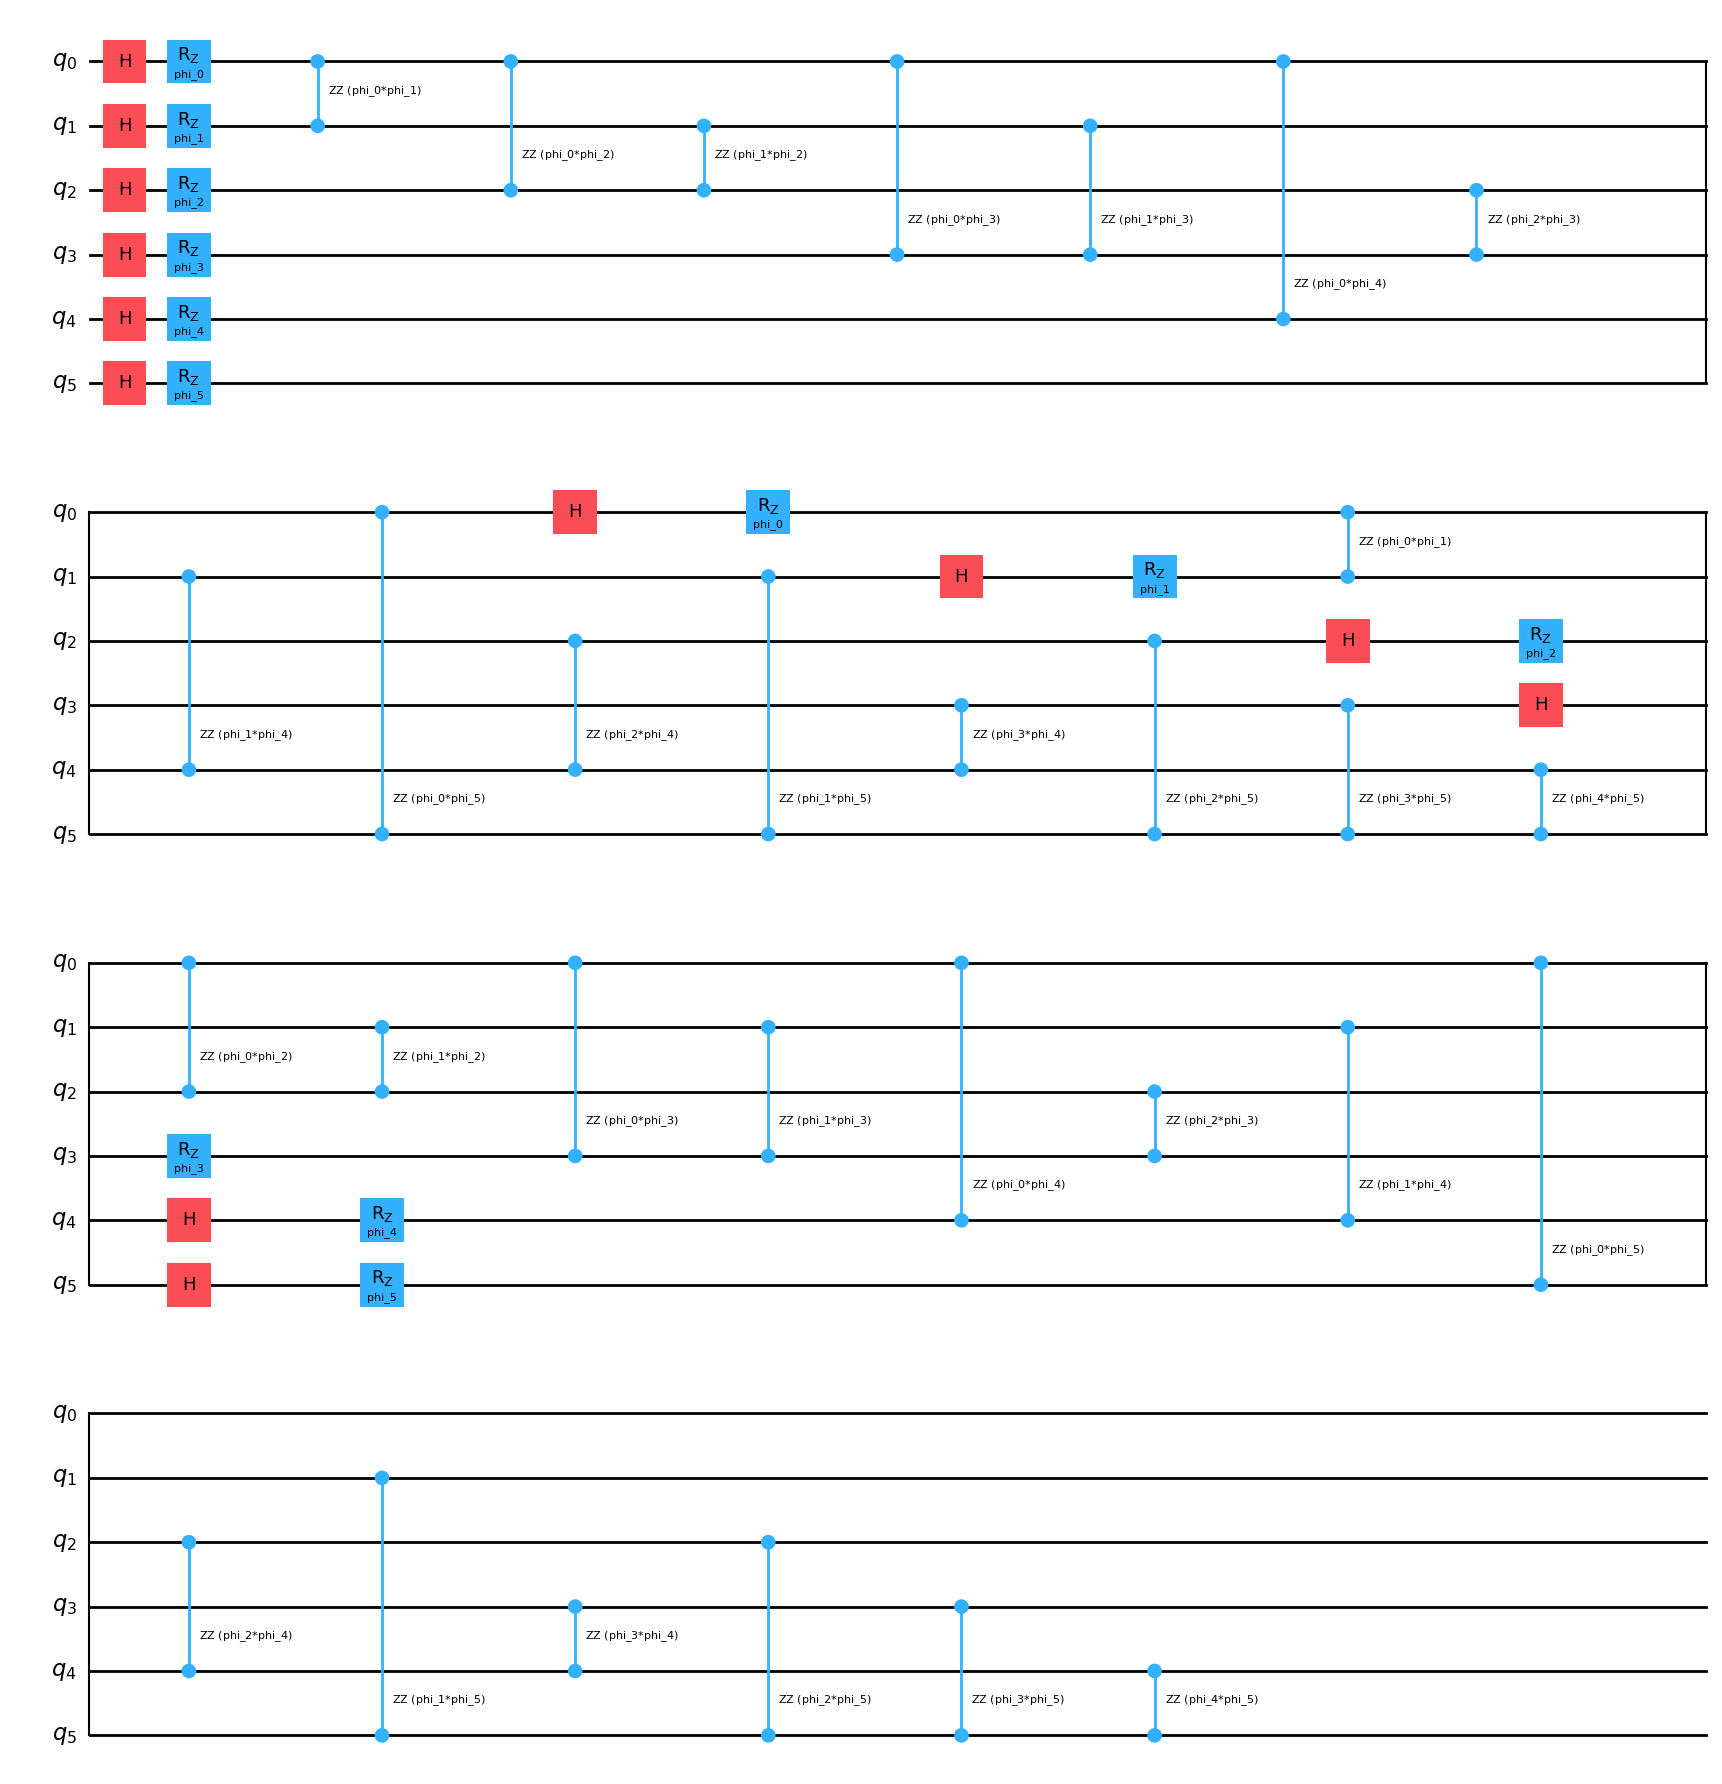

In [29]:
iqp_circ = Circuits.IQP_HuangE2(n_wire=6)

iqp_circ.draw('mpl')

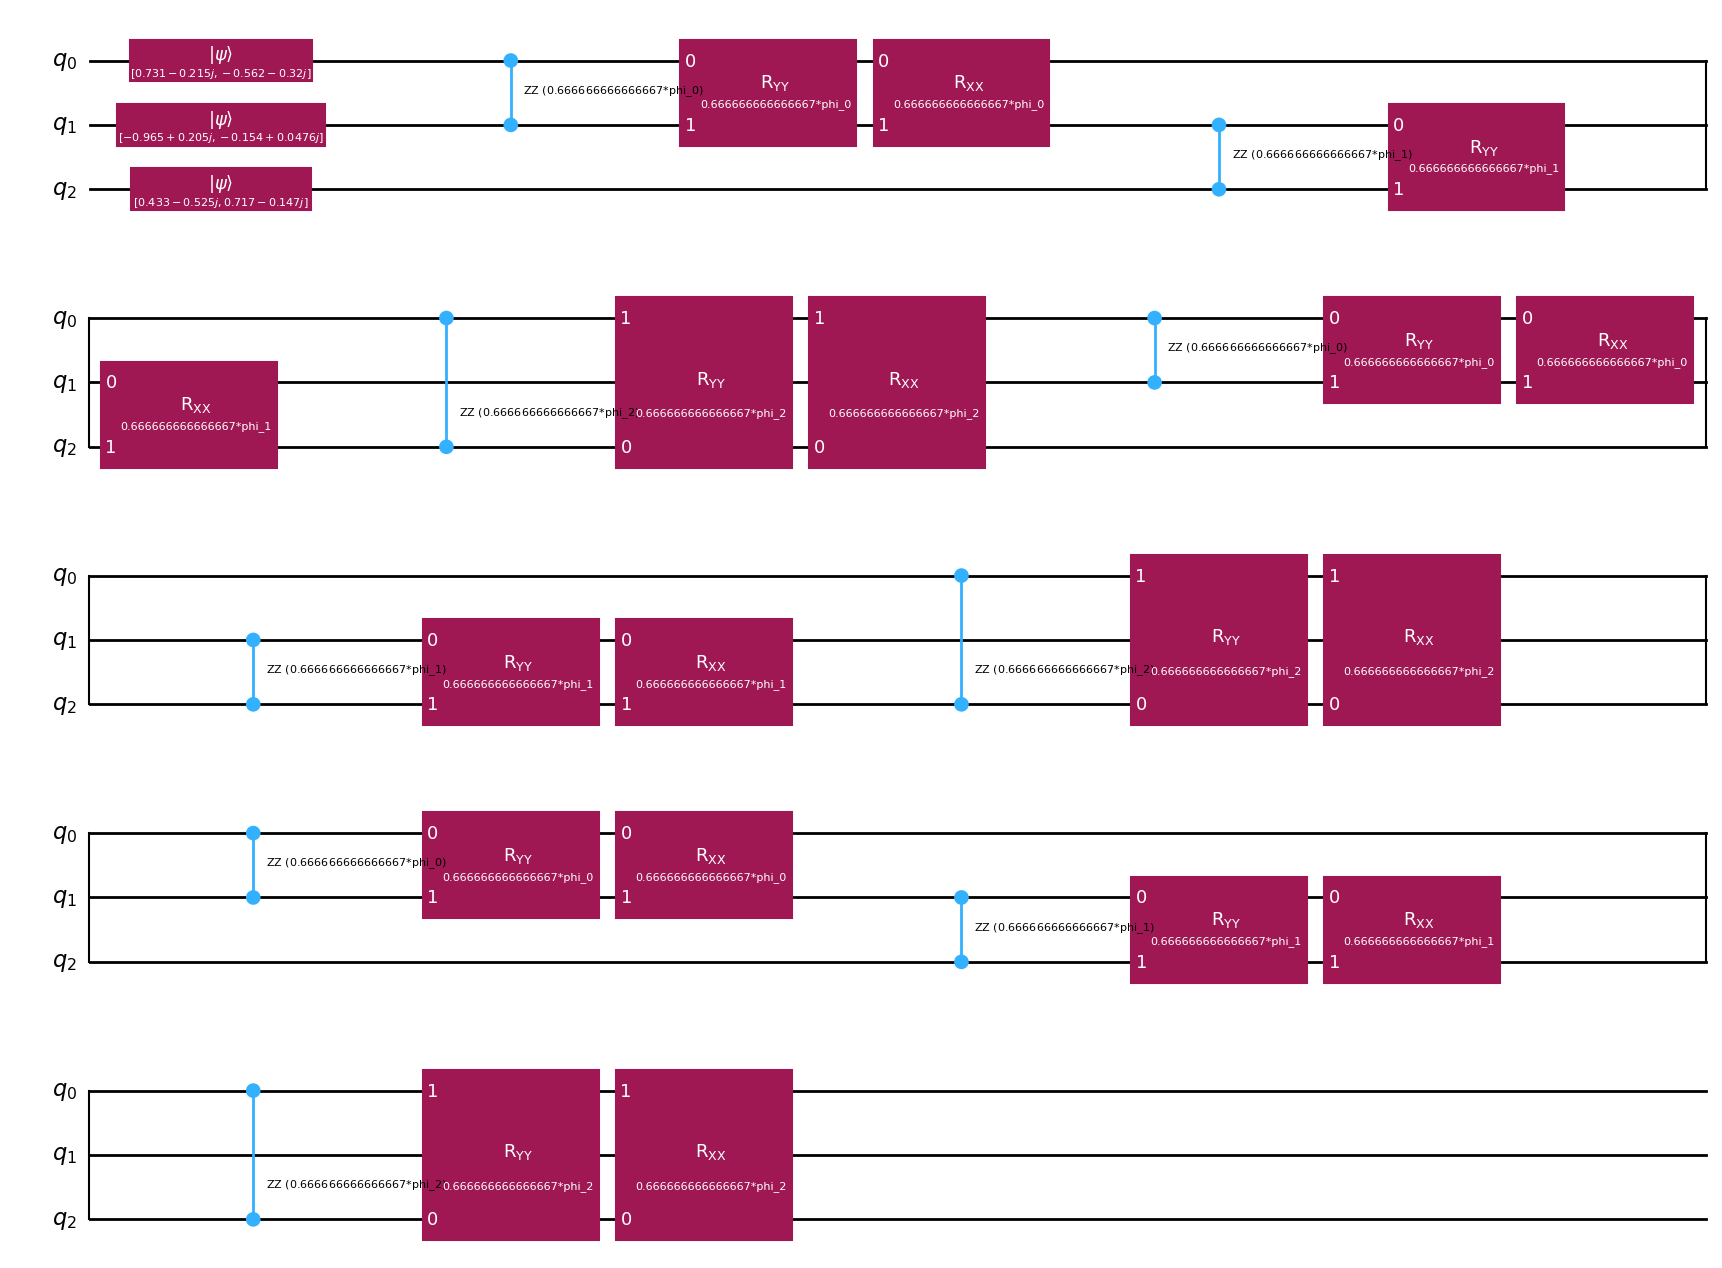

In [10]:
trotter_circ = Circuits.Trotter_HuangE3(n_wire=3, T=3)

trotter_circ.draw('mpl')

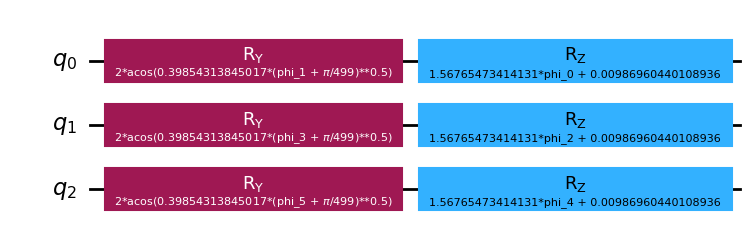

In [34]:
uniform = Circuits.uniform_bloch_encoding(n_wire=3)

uniform.draw('mpl')